In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from mpl_toolkits.mplot3d import Axes3D

running
1000
Running sim
Frame number: 0
Frame number: 0
Frame number: 0
Frame number: 100
Frame number: 200
Frame number: 300
Frame number: 400
Frame number: 500
Frame number: 600
Frame number: 700
Frame number: 800
Frame number: 900
Frame number: 1000
animated successfully


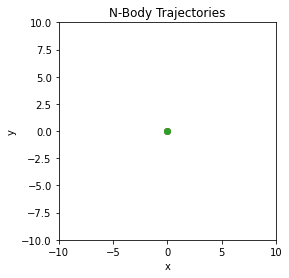

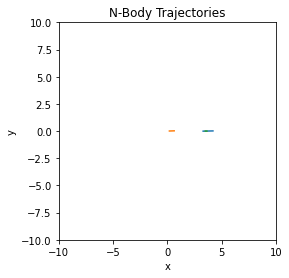

[3.28601003 4.18735125]


In [20]:
# Defining a new body class

class body:
    def __init__(self, name, mass, pos = np.zeros(2), v = np.zeros(2)):
        self.name = name
        self.mass = mass
        self.r = [pos]
        self.v = [v]

# Calculating the acceleration of a single body

def calc_acc(bodies, i):
    G = 1 # G = 6.67408e-11 m3 kg-1 s-2
    acc = np.zeros(2)
    for ind in range(len(bodies)):
        if ind != i:
            r = bodies[i].r[-1][:] - bodies[ind].r[-1][:]
            r_mag = np.linalg.norm(r)
            r_mag = np.where(r_mag <= 1e-2, 1e-1, r_mag)
            acc += r * G * bodies[ind].mass / r_mag**3
    
    return acc

# Calculate the new position

def calc_pos(bodies, time_step = 1e-3):
    for i in range(len(bodies)):
        acc = calc_acc(bodies, i)

        bodies[i].v.append(acc * time_step)
        bodies[i].r.append(bodies[i].v[-1][:] * time_step)

    return bodies

# Generate random bodies

def rand_bodies(N):
    bodies = []
    for i in range(N):
        name = 'Particle ' + str(i)
        r0 = 5*np.array((np.random.rand(), np.random.rand()))
        v0 = np.array((np.random.rand(), np.random.rand()))
        b = body(name, 1, r0, v0)
        bodies.append(b)
    return bodies

def run_sim(bodies, t_list, t_step):
    print("Running sim")
    for t in t_list:
        calc_pos(bodies, t_step)

    N = len(bodies)

    pos = np.zeros((N, len(t_list)+1, 2))
    v = np.zeros((N, len(t_list)+1, 2))
    for i in range(N):
        pos[i][:][:] = bodies[i].r
        v[i][:][:] = bodies[i].v
    
    return pos, v


def main():
    print("running")

    N = 3
    time = 100
    time_step = 1e-1
    t_list = np.arange(0, time, time_step)

    print(len(t_list))

    bodies = rand_bodies(N)
    pos, v = run_sim(bodies, t_list, time_step)

    fig = plt.figure(1)
    ax = plt.axes(xlim = (-10, 10), ylim = (-10, 10))
    ax.set_aspect('equal', 'box')
    plt.title('N-Body Trajectories')
    plt.xlabel('x')
    plt.ylabel('y')

    particles = np.array([plt.plot([],[], marker='o')[0] for k in range(N)])
    trajectories = np.array([plt.plot([],[], marker='o')[0] for k in range(N)])

    def update(t):
        for i in range(N):
            particles[i].set_data(pos[i][t][:])
        if t % 100 == 0:
            print("Frame number:", t)
        return np.concatenate([particles, trajectories])

    animation = anim.FuncAnimation(fig, update, frames=len(t_list)+1, interval = 30, blit = True)
    animation.save('n_body.gif', writer='imagemagick', fps=2)

    print("animated successfully")

    fig1 = plt.figure(2)
    ax1 = plt.axes(xlim = (-10, 10), ylim = (-10, 10))
    ax1.set_aspect('equal', 'box')
    plt.title('N-Body Trajectories')
    plt.xlabel('x')
    plt.ylabel('y')
    for i in range(N):
        plt.plot(pos[i][:][0], pos[i][:][1])
    plt.show()

    print(pos[0][:][0])

main()
